In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
import statsmodels.api as sm

In [36]:
def scale_df(data,cols):
    data_scaler = MinMaxScaler(feature_range=(0,1))
    scaling_cols = cols
    data_scaled = data[scaling_cols]
    data_scaled = data_scaler.fit_transform(data_scaled)
    data_scaled = pd.DataFrame(data_scaled,columns = scaling_cols)
    data = data.drop(scaling_cols,axis=1)
    data[scaling_cols] = data_scaled
    return data

In [39]:
data.head(5)

,Customer Lifetime Value,CLTV growth YoY %,Credit Rating,Overdue frequency(in 12months),Outstanding Amount(in 12 months in 1000s),Average Purchase Value(in 1000s),Likelihood of churn,Target
0,451440,3,673,8,555,226,0.566037,0
1,405120,-17,514,3,451,458,0.556981,1
2,1125120,-20,789,10,521,541,0.094474,0
3,1050000,-14,585,9,547,187,0.186044,2
4,3546720,-2,448,4,673,400,0.363975,1


In [40]:
data = pd.read_excel('Final_Data_2.xlsx',Sheet1=0)

In [41]:
cols = ['Customer Lifetime Value', 'CLTV growth YoY %', 'Credit Rating',
       'Overdue frequency(in 12months)',
       'Outstanding Amount(in 12 months in 1000s)',
       'Average Purchase Value(in 1000s)', 'Likelihood of churn']

In [42]:
X = data[cols]
y = data.Target

In [43]:
X = scale_df(X,cols)

C:\Users\skuma542\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [45]:
clf=RandomForestClassifier(n_estimators=150,random_state=0)

In [46]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [47]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print('Overall Accuracy(Test data): ',accuracy_score(y_test, y_pred_test))
print('Overall Accuracy(Train data): ',accuracy_score(y_train, y_pred_train))


Overall Accuracy(Test data):  0.9390243902439024
Overall Accuracy(Train data):  1.0


In [48]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [60]:
print(feature_importances)
pd.DataFrame(classification_report(y_test, y_pred_test,output_dict=True))[['0','1','2']]

                                           importance
Overdue frequency(in 12months)               0.436652
Credit Rating                                0.307746
Average Purchase Value(in 1000s)             0.074869
Customer Lifetime Value                      0.052080
Outstanding Amount(in 12 months in 1000s)    0.044030
CLTV growth YoY %                            0.043770
Likelihood of churn                          0.040853


,0,1,2
f1-score,0.940397,0.944162,0.930556
precision,0.959459,0.920792,0.943662
recall,0.922078,0.968750,0.917808
support,77.000000,96.000000,73.000000


In [61]:
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     174.6
Date:                Wed, 11 Sep 2019   Prob (F-statistic):          1.93e-148
Time:                        12:33:08   Log-Likelihood:                -805.72
No. Observations:                 701   AIC:                             1625.
Df Residuals:                     694   BIC:                             1657.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [72]:
import xgboost as xgb
x = xgb.XGBClassifier(random_state=0,max_depth=9).fit(X,y)
y_pred_test2 = x.predict(X_test)
print('Overall Accuracy(Test data): ',accuracy_score(y_test, y_pred_test2))

Overall Accuracy(Test data):  1.0


In [50]:
import xgboost
import shap

shap.initjs()

In [62]:
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

C:\Users\skuma542\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\skuma542\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


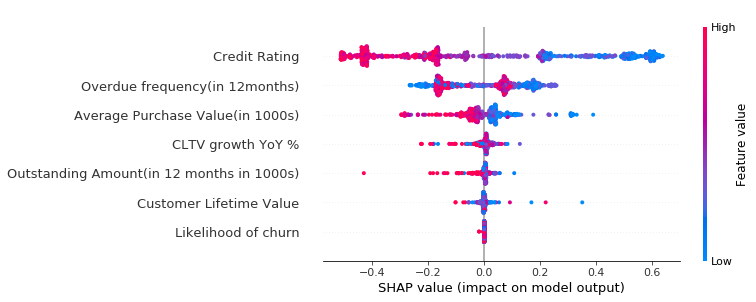

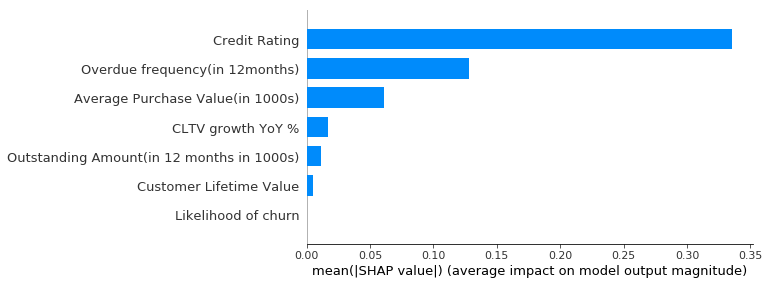

In [52]:
shap.summary_plot(shap_values, X)
shap.summary_plot(shap_values, X, plot_type="bar")
shap.force_plot(explainer.expected_value, shap_values, X)